<font size=7> chip21769 - kanaic acid 1

In [4]:
from human_hip import spike_data
import numpy as np                                                    # Packages for data analysis
import matplotlib.pyplot as plt
from human_hip.spike_data import correlation_matrix, eigenvalues_eigenvectors, plot_eigenvectors #firing_rates,
import scipy.cluster.hierarchy as sch

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/derived/kilosort2/Hc120523_aav9hckcr1_chip21769_121123_2_acqm.zip" )


# Raster and Summary Stats

In [3]:
spike_data.text_summary( sd )

Number of spikes:  61077
Length:  510 seconds
Number of Neurons:  55
Average Firing Rate:  2.18
Coefficient of Variation:  0.571


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

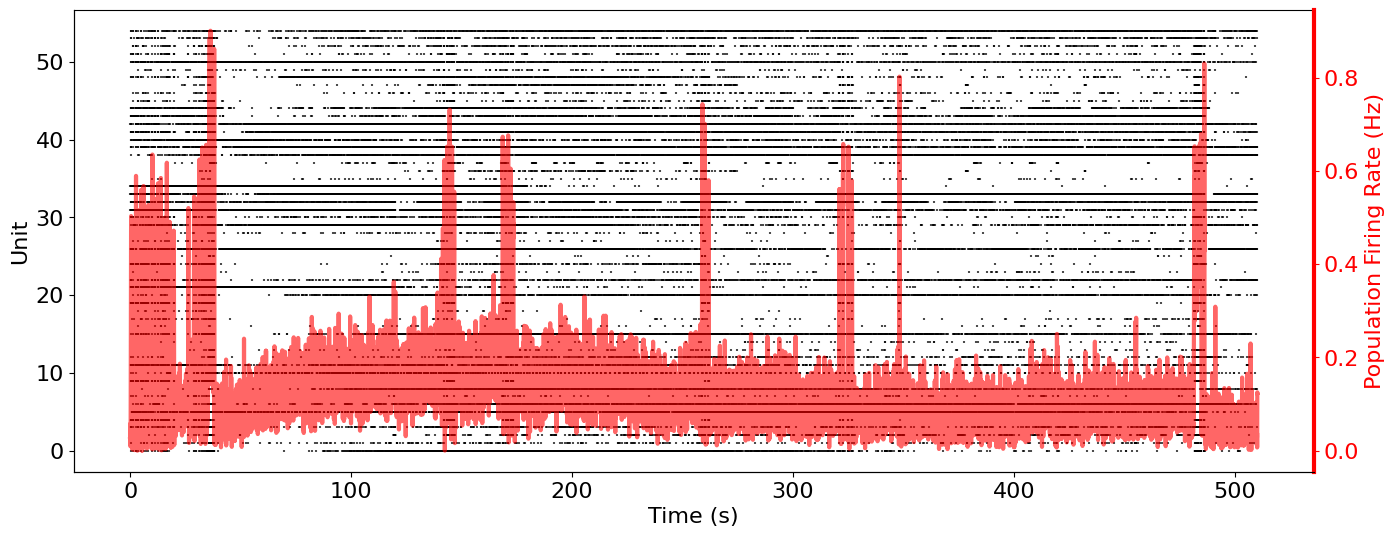

In [10]:
spike_data.plot_raster( sd )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

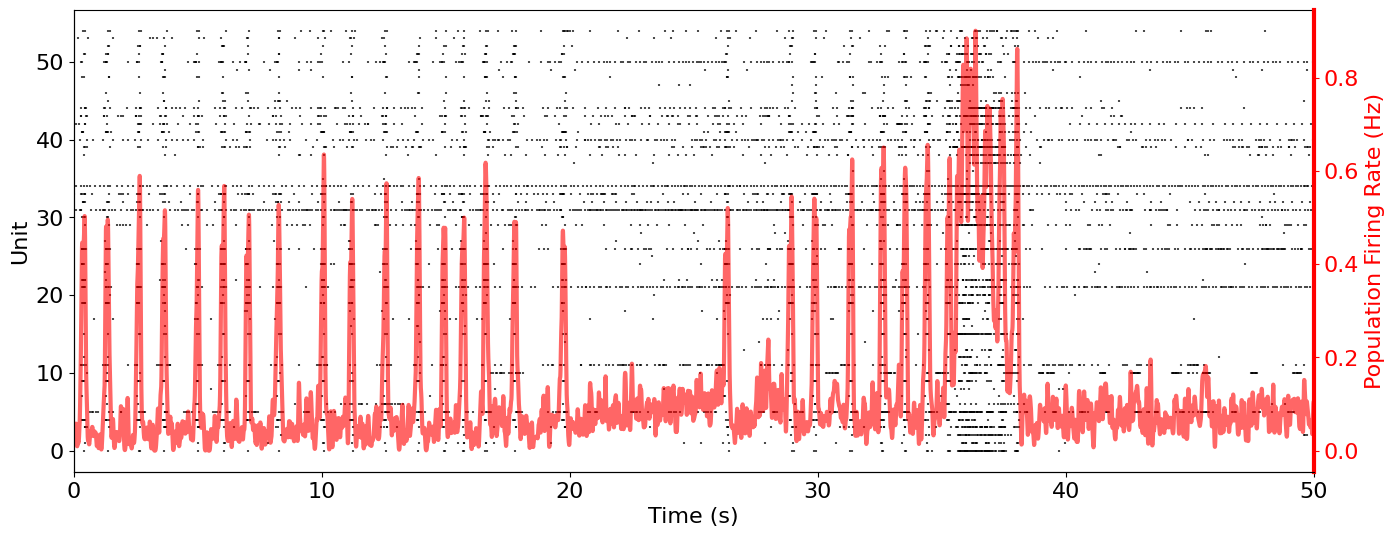

In [11]:
spike_data.plot_raster( sd, xlim=(0, 50) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

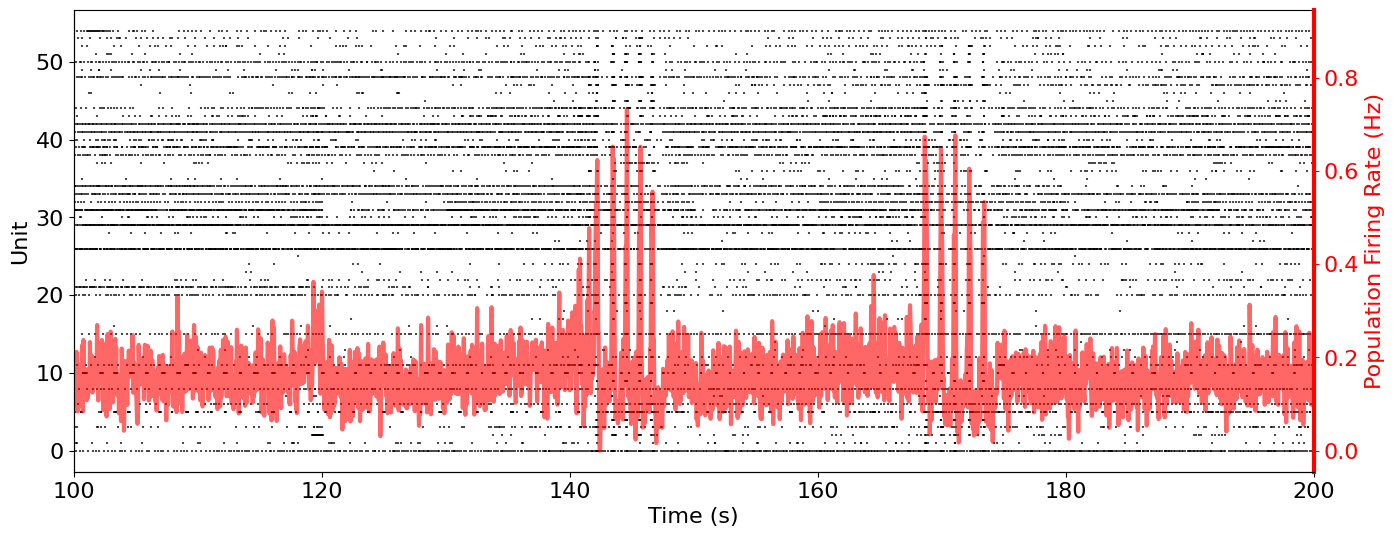

In [12]:
spike_data.plot_raster( sd,  xlim=(100, 200) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

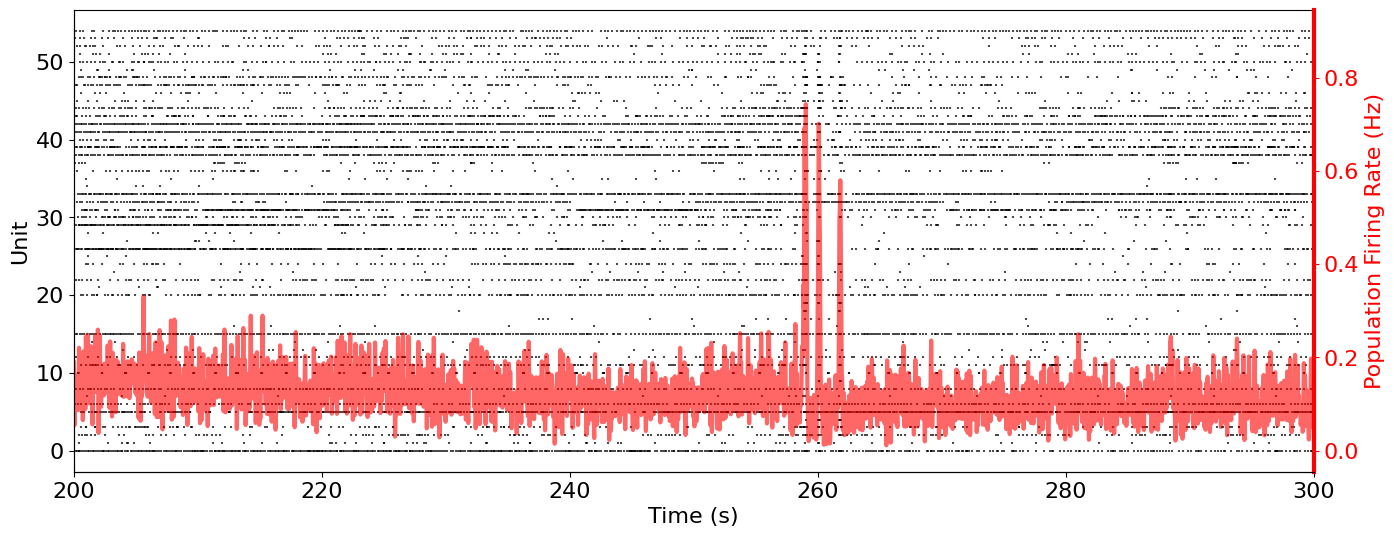

In [13]:
spike_data.plot_raster( sd,  xlim=(200, 300) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

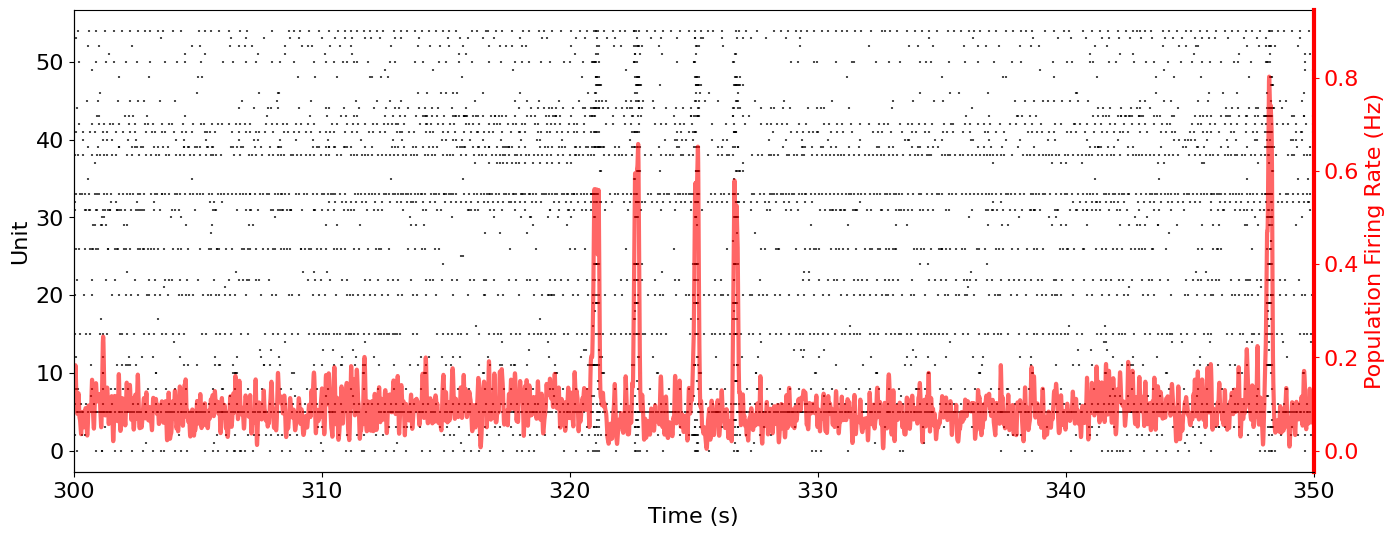

In [14]:
spike_data.plot_raster( sd,  xlim=(300, 350) )

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

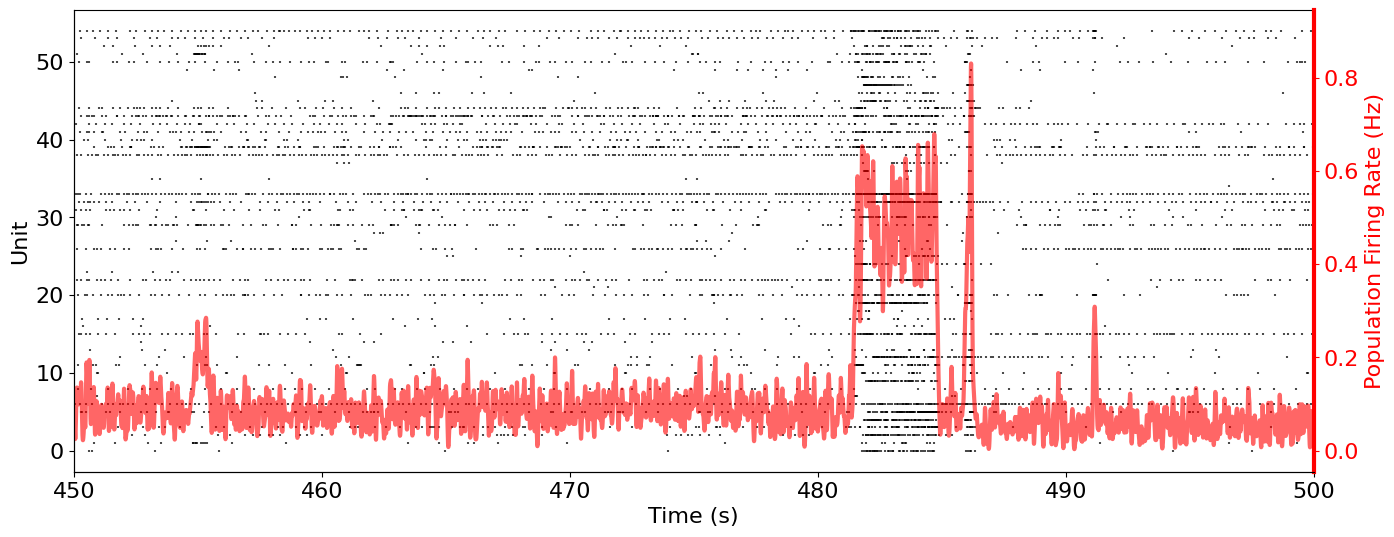

In [15]:
spike_data.plot_raster( sd,  xlim=(450, 500) )

# <font color="brown"> STTC Tests

(array([  2.,   2.,   4.,   6.,  20.,  54.,  80., 132., 250., 306., 326.,
        300., 244., 260., 216., 156.,  92.,  90.,  82.,  46.,  50.,  44.,
         32.,  18.,  24.,  20.,   6.,   8.,  16.,   2.,  16.,   2.,  10.,
         10.,  10.,   6.,   0.,   8.,   2.,   4.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   2.,   2.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         55.]),
 array([-9.98410721e-02, -8.88426614e-02, -7.78442507e-02, -6.68458400e-02,
        -5.58474293e-02, -4.48490185e-02, -3.38506078e-02, -2.28521971e-02,
        -1.18537864e-02, -8.55375645e-04,  1.01430351e-02,  2.11414458e-02,
         3.21398565e-02,  4.31382672e-02,  5.41366780e-02,  6.51350887e-02,
         7.613

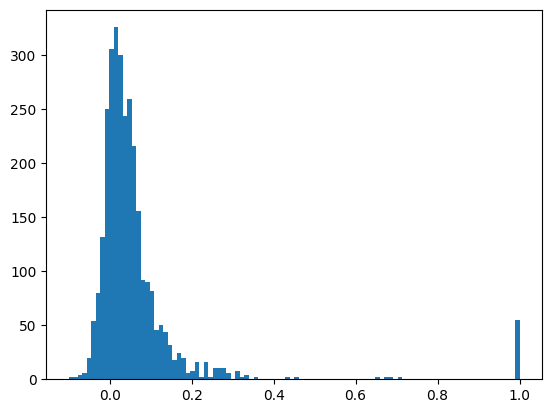

In [5]:
neo = sd.spike_time_tilings()
plt.hist( neo.flatten(), bins=100 )

In [7]:
np.sum(neo.flatten()<0.6)/neo.size

0.9791735537190083

In [8]:
neo = sd.spike_time_tilings()
#sttc_cuttoff = 0.3
sttc_cuttoff = 0.6
neo = np.where( neo<sttc_cuttoff, neo, neo*0 ) #+sttc_cuttoff )
#neo = np.where( neo<sttc_cuttoff, neo, (neo*0)+sttc_cuttoff ) #+sttc_cuttoff )

In [9]:

d = sch.distance.pdist(neo)  # vector of pairwise distances
L = sch.linkage(d, method='complete')  # linkage matrix
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering

In [10]:
ind = sch.leaves_list(sch.optimal_leaf_ordering(L, d))  # optimal leaf ordering

# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
neo_sorted = neo[ind[::-1], :][:, ind]
for i in range(neo_sorted.shape[0]):
    neo_sorted[i] = neo_sorted[i][::-1]


# Reorder correlation matrix
#neo_sorted = neo[ind, :][:, ind]
# neo_sorted = neo[ind[::-1], :][:, ind]
# for i in range(neo_sorted.shape[0]):

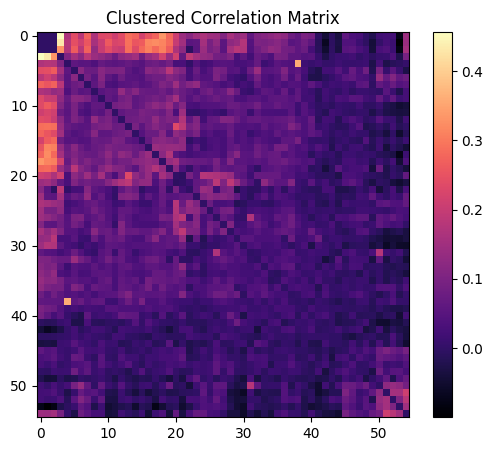

In [11]:
plt.figure(figsize=(6, 5))
plt.title('Clustered Correlation Matrix')
plt.imshow(neo_sorted, aspect='auto', cmap="magma" )
plt.colorbar()

In [14]:
neuron_group1 = ind[::-1][0:20] #ind[140:]
neuron_group2 = ind[::-1][20:] #ind[60:140]

/tmp/ipykernel_26946/3241046237.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
/tmp/ipykernel_26946/3241046237.py:21: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
/tmp/ipykernel_26946/3241046237.py:22: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
/tmp/ipykernel_26946/3241046237.py:31: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead 

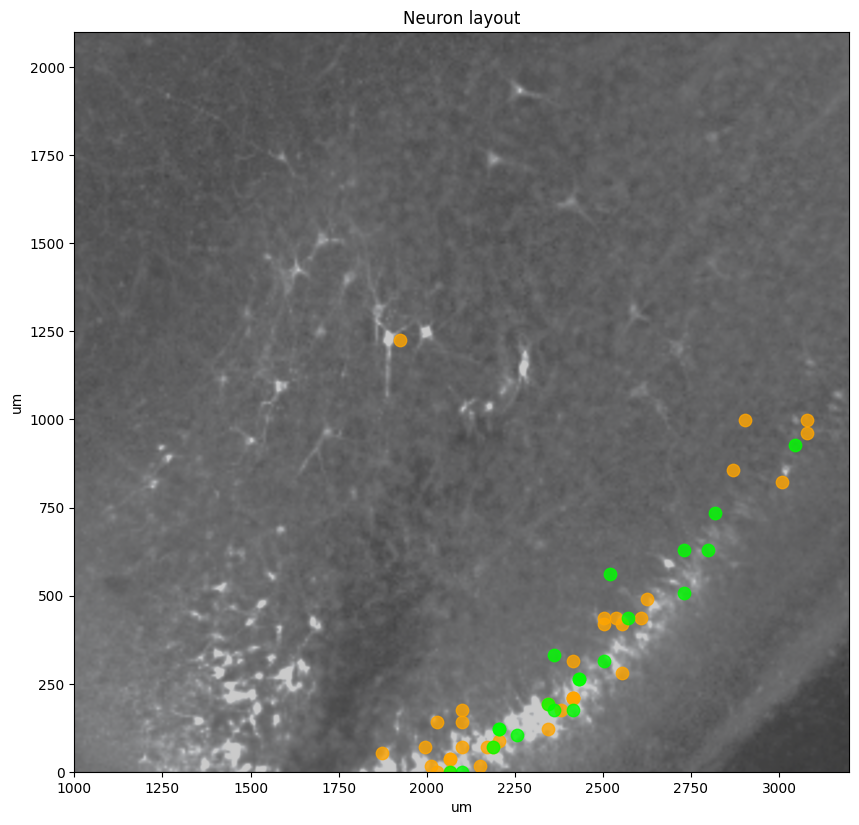

In [15]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values(): # Plots neurons on a 2-d space, representing their positions on the array
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])

plt.figure(figsize=(10,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/chip21769_bw2.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
#ax = plt.axes()
plt.xlim(1000, 3200)
plt.ylim(0,2100)
#ax.set_facecolor((0.6, 0.6, 0.6)) 


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group2:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="orange", alpha=.8, s=80 )  


# plot neurons
neuron_x = []
neuron_y = []
#for key,val in sd.neuron_data[0].items():
for neuron_ind in neuron_group1:
    neuron_x.append( sd.neuron_data[0][neuron_ind]["position"][0] )
    neuron_y.append( sd.neuron_data[0][neuron_ind]["position"][1] )
plt.scatter( neuron_x, neuron_y,  c="lime", alpha=.8, s=80 )  



plt.xlabel('um')
plt.ylabel('um')
plt.title("Neuron layout")
#plt.colorbar()
plt.show()